In [2]:
from imports import *

In [19]:
# sf = datasets.fetch_kddcup99(subset='SF', random_state=0, percent10=False)
# dfsf = pd.DataFrame(sf.data, columns=sf_columns)
df = pd.read_csv('kddcup.data', delimiter=',')
df.columns = sa_columns + ["target"]

df_normal = df[df["target"]== 'normal.']
df_attacks = df[df["target"]!= 'normal.']

target_anomaly_rate = 0.3
df_attacks = df_attacks.sample(n = int(len(df_normal)*target_anomaly_rate), random_state=1)

df_train = df_normal.append(df_attacks)
anomaly_rate = 1.0 - len(df_train.loc[df_train["target"]=='normal.'])/len(df_train)
print(f"anomaly rate is {anomaly_rate:.1%}")

df_train['binary_target'] = [1 if x=='normal.' else -1 for x in df_train["target"]]
df_train = df_train.sample(frac=1, random_state=2)
toDecode = ["protocol_type", "service", "flag", "target"]
leSF = preprocessing.LabelEncoder()
for f in toDecode:
    df_train[f] = leSF.fit_transform(df_train[f])

x_train, x_test, y_train, y_test = train_test_split(df_train.drop(["target", 'binary_target'], axis=1), df_train['binary_target'], test_size=0.33, random_state=0)
results = []

anomaly rate is 23.1%


In [20]:
def cross_validation(contamination):
    highest_score = 0
    highest_score_c = 0
    #print("array:", contamination)
    for c in contamination:
        y_pred = IsolationForest(random_state=1, n_jobs=-1, max_samples=0.25, n_estimators=100, contamination=c).fit(x_train).predict(x_test)
        p, r, f, s = map(lambda x: x[0], precision_recall_fscore_support(y_test, y_pred, labels=[-1]))
        if p + r > highest_score: highest_score = p; highest_score_c = c
        fp = s / p - s
        print(f"contamination: {c}, AUC : {roc_auc_score(y_test, y_pred):.1}, precision: {p}, support: {s}, recall: {r}, fp: {int(round(fp, 0))}")
    return highest_score_c

In [11]:
contamination = [round(0.01 + 0.01*i, 2) for i in range(10)]
c_max = cross_validation(contamination)
c_max

contamination: 0.01, AUC : 0.5, precision: 0.29918356597313667, support: 64369, recall: 0.01764824682688872, fp: 150780
contamination: 0.02, AUC : 0.5, precision: 0.3205723124516628, support: 64369, recall: 0.03863661079090867, fp: 136425
contamination: 0.03, AUC : 0.5, precision: 0.36767989009101837, support: 64369, recall: 0.06652270502881821, fp: 110699
contamination: 0.04, AUC : 0.5, precision: 0.3609718472811415, support: 64369, recall: 0.08724696670757663, fp: 113952
contamination: 0.05, AUC : 0.5, precision: 0.3211765311904394, support: 64369, recall: 0.0968633969768056, fp: 136047
contamination: 0.06, AUC : 0.5, precision: 0.29882778831235995, support: 64369, recall: 0.10772266152961829, fp: 151036
contamination: 0.07, AUC : 0.5, precision: 0.29240776128178747, support: 64369, recall: 0.12361540493094501, fp: 155765
contamination: 0.08, AUC : 0.5, precision: 0.2924187725631769, support: 64369, recall: 0.140937407758393, fp: 155757
contamination: 0.09, AUC : 0.5, precision: 0.29

0.1

In [21]:
contamination = [round(0.1*i, 1) for i in range(1, 7)]
c_max = cross_validation(contamination)
c_max

contamination: 0.1, AUC : 0.5, precision: 0.33631101264918173, support: 96177, recall: 0.14679185252191274, fp: 189799
contamination: 0.2, AUC : 0.6, precision: 0.3758221332570775, support: 96177, recall: 0.3279578277550766, fp: 159734
contamination: 0.3, AUC : 0.6, precision: 0.3413096626771704, support: 96177, recall: 0.4441706437089949, fp: 185611
contamination: 0.4, AUC : 0.6, precision: 0.2946825420628018, support: 96177, recall: 0.5108081973860694, fp: 230198
contamination: 0.5, AUC : 0.6, precision: 0.2946825420628018, support: 96177, recall: 0.5108081973860694, fp: 230198
contamination: 0.6, AUC : 0.8, precision: 0.38523654453910766, support: 96177, recall: 1.0, fp: 153480


0.6

In [22]:
contamination = [round(c_max - 0.1 + 0.01*i, 2) for i in range(11)]
c_max = cross_validation(contamination)
c_max

contamination: 0.5, AUC : 0.6, precision: 0.2946825420628018, support: 96177, recall: 0.5108081973860694, fp: 230198
contamination: 0.51, AUC : 0.6, precision: 0.2946825420628018, support: 96177, recall: 0.5108081973860694, fp: 230198
contamination: 0.52, AUC : 0.8, precision: 0.4444326352562799, support: 96177, recall: 1.0, fp: 120227
contamination: 0.53, AUC : 0.8, precision: 0.43553887049809126, support: 96177, recall: 1.0, fp: 124646
contamination: 0.54, AUC : 0.8, precision: 0.4276300871026691, support: 96177, recall: 1.0, fp: 128730
contamination: 0.55, AUC : 0.8, precision: 0.4199447217091733, support: 96177, recall: 1.0, fp: 132846
contamination: 0.56, AUC : 0.8, precision: 0.4125307220156216, support: 96177, recall: 1.0, fp: 136962
contamination: 0.57, AUC : 0.8, precision: 0.4052748901240134, support: 96177, recall: 1.0, fp: 141136
contamination: 0.58, AUC : 0.8, precision: 0.3985141232871604, support: 96177, recall: 1.0, fp: 145162
contamination: 0.59, AUC : 0.8, precision: 

0.6

AUC: 57.2%
              precision    recall  f1-score   support

          -1       0.29      0.51      0.37     96177
           1       0.81      0.63      0.71    321146

    accuracy                           0.61    417323
   macro avg       0.55      0.57      0.54    417323
weighted avg       0.69      0.61      0.63    417323



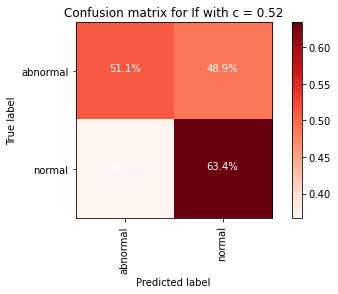

In [25]:
y_pred = IsolationForest(random_state=1, n_jobs=-1, max_samples=0.25, n_estimators=100, contamination=0.51).fit(x_train).predict(x_test)
cm_if = confusion_matrix(y_test, y_pred)
print(f"AUC: {roc_auc_score(y_test, y_pred):.1%}")
print(classification_report(y_test, y_pred))
plot_confusion_matrix(cm_if, f"Confusion matrix for If with c = {0.52}")